<a href="https://colab.research.google.com/github/GeorgeShmelin/PythonStudy/blob/main/Data_Science_Course_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import plotly.offline as py

In [ ]:
import seaborn as sns

In [ ]:
df_original = pd.read_csv('https://raw.githubusercontent.com/GeorgeShmelin/my-gitproject/main/churn_data_before_processing.csv', header = 0, index_col = 0, nrows = 10150)

In [ ]:
df_original.shape

(10150, 14)

In [ ]:
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [ ]:
df_original.drop(['RowNumber'], axis = 1, inplace = True)

In [ ]:
df_original.sample(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5914,15726058,Cattaneo,754.0,Germany,Male,27.0,7.0,117578.35,2.0,0.0,1.0,87908.01,0
496,15662403,Kryukova,622.0,France,Female,32.0,6.0,169089.38,2.0,1.0,0.0,101057.95,0
6490,15620751,Secombe,760.0,France,Male,34.0,2.0,0.00,2.0,1.0,0.0,164162.44,0


In [ ]:
df_original.tail(2) # the bottom line?

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4590,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0


In [ ]:
df_original.dtypes

CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df_original.info

<bound method DataFrame.info of       CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0       15634602  Hargrave        619.0    France  Female  42.0     2.0   
1       15647311      Hill        608.0     Spain  Female  41.0     1.0   
2       15619304      Onio        502.0    France  Female  42.0     8.0   
3       15701354      Boni        699.0    France  Female  39.0     1.0   
4       15737888  Mitchell        850.0     Spain  Female  43.0     2.0   
...          ...       ...          ...       ...     ...   ...     ...   
3612    15792151  Hamilton        635.0     Spain  Female  37.0     3.0   
4437    15779522    Efimov        736.0    France  Female  24.0     0.0   
6549    15792029       Lee        620.0    France    Male  32.0     6.0   
4590    15680167   Thomson        635.0    France  Female  78.0     6.0   
8       15792365        He        501.0    France    Male  44.0     4.0   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  Estimate

In [ ]:
pd.isna(df_original).sum()  # or pd.isna(df).any()

CustomerId           0
Surname             94
CreditScore         18
Geography          196
Gender             283
Age                271
Tenure              80
Balance            156
NumOfProducts      288
HasCrCard           83
IsActiveMember      87
EstimatedSalary     44
Exited               0
dtype: int64

In [ ]:
df_original.duplicated().sum() # ? - I should check further

104

As **df** gradually will be cleaned and updated, I need **df_origina**l for references to the original DATA I got

In [ ]:
df = df_original

# --------------------------------------------------------------------------------

# **CustomerId**

In [ ]:
df.CustomerId.dtypes

dtype('int64')

In [ ]:
df.CustomerId.isna().sum()

0

In [ ]:
df.CustomerId.value_counts(dropna = False)

15733661    3
15775490    2
15618155    2
15604818    2
15566740    2
           ..
15726796    1
15754952    1
15652192    1
15681924    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [ ]:
df.CustomerId.duplicated().sum() # to check

150

In [ ]:
df.shape

(10150, 13)

In [ ]:
len(df.CustomerId.unique()) #  ~ 150/151 look duplicated /each time slightly different result – Google Colab ?

10000

In [ ]:
df.loc[df.CustomerId.duplicated(keep = False)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
26,15736816,Young,756.0,NaN,Male,36.0,2.0,136815.64,NaN,1.0,1.0,170041.95,0
151,15759618,Alexeeva,535.0,France,Female,48.0,9.0,0.00,1.0,1.0,0.0,149892.79,1
220,15725311,Hay,726.0,France,Female,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
227,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [ ]:
df.loc[df.CustomerId.isin([15792365, 15725311])] # an example, index 220 - different Gender

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
220,15725311,Hay,726.0,France,Female,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
220,15725311,Hay,726.0,France,NaN,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0


In [ ]:
df.loc[df.duplicated(subset=['CustomerId', 'Surname', 'Balance'],keep=False)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
26,15736816,Young,756.0,NaN,Male,36.0,2.0,136815.64,NaN,1.0,1.0,170041.95,0
151,15759618,Alexeeva,535.0,France,Female,48.0,9.0,0.00,1.0,1.0,0.0,149892.79,1
220,15725311,Hay,726.0,France,Female,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
227,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [ ]:
# repeating values to deal with

In [ ]:
df.drop_duplicates(subset= ['CustomerId', 'Surname', 'Balance'], keep = 'first', inplace =True)

In [ ]:
df.shape

(10006, 13)

In [ ]:
df.loc[df.CustomerId.duplicated(keep = False)] # Even, now it should be checked further

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2105,15615096,Costa,492.0,France,Female,NaN,7.0,0.00,2.0,1.0,1.0,49463.44,0
3207,15652400,Moss,667.0,Spain,Male,56.0,2.0,168883.08,1.0,0.0,1.0,18897.78,0
5871,15709920,Burke,479.0,France,Female,33.0,2.0,208165.53,1.0,0.0,0.0,50774.81,1
6347,15754820,Bergamaschi,637.0,Germany,Male,35.0,8.0,147127.81,2.0,1.0,1.0,84760.70,0
6496,15789313,Ugorji,595.0,Germany,Female,44.0,4.0,96553.52,2.0,1.0,0.0,143952.24,1
9504,15591724,Liu,560.0,France,Female,44.0,5.0,143244.97,1.0,1.0,0.0,98661.27,0
2105,15615096,Costa,492.0,France,Female,31.0,7.0,NaN,2.0,1.0,1.0,49463.44,0
9504,15591724,Liu,560.0,France,Female,44.0,5.0,NaN,1.0,1.0,0.0,98661.27,0
6347,15754820,Bergamaschi,637.0,Germany,Male,35.0,8.0,NaN,2.0,1.0,1.0,84760.70,0
5871,15709920,Burke,479.0,France,Female,33.0,2.0,NaN,1.0,0.0,0.0,50774.81,1


In [ ]:
len(df.loc[df.CustomerId.duplicated(keep = False)]) # Limited number, could be checked more carefully 

12

In [ ]:
df.loc[df.CustomerId.isin([15615096])] # 'Balance', to check all that left

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2105,15615096,Costa,492.0,France,Female,NaN,7.0,0.0,2.0,1.0,1.0,49463.44,0
2105,15615096,Costa,492.0,France,Female,31.0,7.0,NaN,2.0,1.0,1.0,49463.44,0


Looks as simply some mess in ‘Balance’ – I am going to leave ‘first’ as duplicates     
In my view it’s a reasonable compromise in this case 


In [ ]:
df.drop_duplicates(subset= ['CustomerId', 'Surname'], keep = 'first', inplace =True)

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.CustomerId.duplicated().sum() # looks much better

0

In [ ]:
# customerID (if to keep) should finaly be a non-numeric, i.e categorical value

# **Surname**

In [ ]:
df.Surname.dtypes

dtype('O')

In [ ]:
df.Surname = df.Surname.astype(str)

In [ ]:
df['Surname'].value_counts(dropna = False)

nan         92
Smith       32
Martin      29
Scott       29
Walker      28
            ..
Valentin     1
Izmailov     1
Bold         1
Bonham       1
Burbidge     1
Name: Surname, Length: 2926, dtype: int64

In [ ]:
# NaN values

In [ ]:
len(df['Surname'].unique()) - 1   # number or surnames in the data

2925

In [ ]:
df.Surname.isna().sum()

0

In [ ]:
df.Surname.str.len()  # checking for nonsense staff

0       8
1       4
2       4
3       4
4       8
       ..
9995    8
9996    9
9997    3
9998    9
9999    6
Name: Surname, Length: 10000, dtype: int64

In [ ]:
df.Surname.loc[df.Surname.str.len() < 4] # doesn't work here well

5       Chu
8        He
9       nan
12      Kay
19      Hao
       ... 
9943     Fu
9949    Wan
9951     Ho
9969    Hou
9997    Liu
Name: Surname, Length: 845, dtype: object

In [ ]:
df.loc[df.Surname == 'nan']

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9,15592389,nan,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0
329,15624528,nan,664.0,Germany,Male,26.0,7.0,116244.14,2.0,1.0,1.0,95145.14,0
437,15624623,nan,516.0,France,Male,35.0,10.0,104088.59,2.0,0.0,0.0,119666.00,0
941,15676521,nan,696.0,France,Female,NaN,8.0,0.00,2.0,0.0,0.0,191074.11,0
970,15805955,nan,638.0,France,Female,48.0,10.0,138333.03,1.0,1.0,1.0,47679.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633,15668057,nan,669.0,France,Female,31.0,6.0,113000.66,1.0,1.0,0.0,40467.82,0
9704,15759872,nan,625.0,France,Male,22.0,9.0,0.00,2.0,1.0,0.0,157072.91,0
9792,15787168,nan,819.0,Spain,Female,28.0,8.0,168253.21,1.0,1.0,1.0,102799.14,0
9857,15779423,nan,716.0,France,Male,39.0,1.0,70657.61,2.0,1.0,1.0,76476.05,0


*All those ‘nan’ points look as real accounts’ value, and also –
I don’t need real customers’ surnames for a math prediction model –        I’ll leave the DATA as it is here* 

# **CreditScore**

In [ ]:
df.CreditScore.dtype

dtype('float64')

In [ ]:
df.CreditScore.value_counts(dropna = False)

850.0    231
678.0     63
655.0     54
667.0     53
705.0     52
        ... 
363.0      1
399.0      1
358.0      1
359.0      1
419.0      1
Name: CreditScore, Length: 463, dtype: int64

In [ ]:
df.CreditScore.isna().sum() # Also, to consider 

18

In [ ]:
df.CreditScore.describe()

count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: CreditScore, dtype: float64

In [ ]:
CreditScore_median = df.CreditScore.median()

In [ ]:
df.loc[df.CreditScore.isna(), 'CreditScore'] = CreditScore_median

In [ ]:
df[df.CreditScore == CreditScore_median].sample(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4870,15573888,Ponomaryov,652.0,Germany,Female,43.0,1.0,107963.38,1.0,0.0,0.0,186438.86,1
3594,15578369,Chiedozie,652.0,Germany,Female,37.0,9.0,145219.30,1.0,1.0,0.0,159132.83,0
1152,15589754,Malloy,652.0,Germany,Male,45.0,2.0,151421.44,1.0,0.0,1.0,115333.43,0


In [ ]:
df.CreditScore.isna().sum() # looks better

0

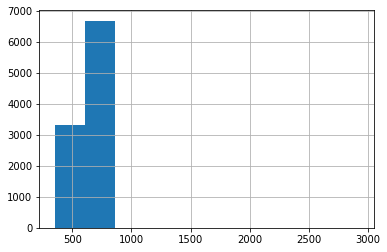

In [ ]:
df_original.CreditScore.hist() # some too big numbers, may just to check

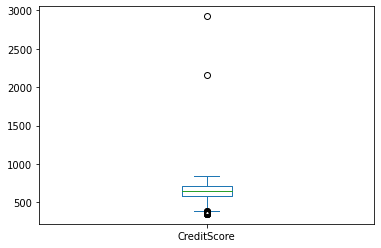

In [ ]:
df_original.CreditScore.plot(kind = 'box') # those 2 outliers should be further check

In [ ]:
df.CreditScore.loc[df.CreditScore > 1500] # I will solve it a bit lower at 'Balance'

2258    2158.510025
8493    2924.008649
Name: CreditScore, dtype: float64

In [ ]:
df.CreditScore.astype(int)

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [ ]:
df.CreditScore.dtype # ?

dtype('float64')

# **Geography**

In [ ]:
df.Geography.dtype

dtype('O')

In [ ]:
df.Geography = df.Geography.astype(str)

In [ ]:
df.Geography.isna().sum() # check

0

In [ ]:
df.Geography.value_counts(dropna = False)

France     4923
Germany    2451
Spain      2431
nan         195
Name: Geography, dtype: int64

In [ ]:
# NaN values as nan

In [ ]:
df.loc[df.Geography == 'nan'].sample(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9917,15755731,Davis,635.0,nan,Male,53.0,8.0,117005.55,1.0,0.0,1.0,123646.57,1
9549,15772604,Chiemezie,578.0,nan,Male,36.0,1.0,157267.95,2.0,1.0,0.0,141533.19,0
1847,15758845,Rocher,590.0,nan,Female,37.0,0.0,64345.21,1.0,0.0,1.0,61759.33,1


In [ ]:
df.replace({ 'Geography': {'nan' : 'non_avail'}},inplace=True)
df.loc[df.Geography == 'non_avail'].sample(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2968,15756932,Caldwell,696.0,non_avail,Female,36.0,7.0,0.0,2.0,1.0,1.0,82298.59,0
9511,15652948,Yen,738.0,non_avail,Male,33.0,4.0,92676.3,1.0,1.0,0.0,105817.63,0


In [ ]:
df.Geography.value_counts() # 652.0 2  -? Appearing periodically? - should be checked

France       4923
Germany      2451
Spain        2431
non_avail     195
Name: Geography, dtype: int64

**---------------------------------------------------------------------------**

Thus, I putting a couple of extra DELETE lines in my CODE. Those lines shouldn’t do any difference on the DATA, but should/could delete this extra-unnecessary appearing rubbish  

In [ ]:
df_original.loc[df_original.Geography.isin([652.0])] # should be checked

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.loc[df.Geography.isin([652.0])] # 652.0 – is MEDIAN for ‘CreditScore’, looks as those 2 values appeared even before me

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.shape

(10000, 13)

In [ ]:
df = df.loc[df.Age < 150] # should delete this 'Geography' = 652.0    Looks very strange, but I failed to delete it a couple of times previously 

In [ ]:
df.shape # double check, result? - Google Colab each time gives different result in the same place ?

(9739, 13)

**--------------------------------------------------------------------------**

# **Gender**

In [ ]:
df.Gender.dtype

dtype('O')

In [ ]:
df.Gender.isna().sum()

271

In [ ]:
df.Gender.value_counts(dropna = False)

Male      5178
Female    4290
NaN        271
Name: Gender, dtype: int64

In [ ]:
# same issue with NaN/nan values

In [ ]:
df.Gender = df.Gender.astype(str)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.replace({ 'Gender': {'nan' : 'non_declared'}},inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.loc[df.Gender == 'non_declared'].sample()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
157,15623595,Clayton,586.0,Spain,non_declared,28.0,2.0,0.0,2.0,1.0,1.0,92067.35,0


In [ ]:
df.Gender.value_counts()

Male            5178
Female          4290
non_declared     271
Name: Gender, dtype: int64

# **Age**

In [ ]:
df.Age.dtype

dtype('float64')

In [ ]:
df.Age.value_counts(dropna = False)

 37.0    467
 38.0    464
 35.0    463
 36.0    441
 34.0    429
        ... 
-23.0      1
 88.0      1
 85.0      1
 83.0      1
-49.0      1
Name: Age, Length: 72, dtype: int64

In [ ]:
df.Age.isna().sum() # to check

0

In [ ]:
df.Age.describe()

count    9739.000000
mean       38.950816
std        10.560797
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [ ]:
df.loc[df.Age < 0] # looks as reasonable values, the only issue is ‘-‘ which I’ll simply change into +

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1383,15696637,Sung,571.0,France,Female,-23.0,10.0,151097.28,1.0,0.0,1.0,17163.75,0
9783,15680430,Ajuluchukwu,601.0,Germany,Female,-49.0,4.0,96252.98,2.0,1.0,NaN,104263.82,0


In [ ]:
df.loc[df.Age < 0, 'Age'] = - df.Age.loc[df.Age < 0]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.Age.describe()

count    9739.000000
mean       38.965602
std        10.506106
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

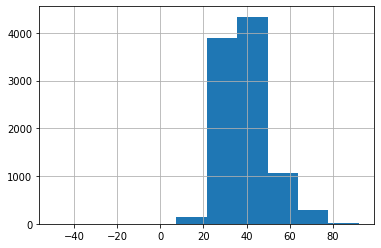

In [ ]:
df_original.Age.hist()

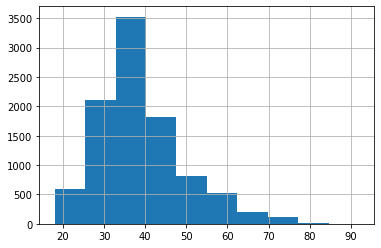

In [ ]:
df.Age.hist() # now looks more reasonable

In [ ]:
len(df[df.Age < 18])

0

In [ ]:
len(df[df.Age <= 18]) # looks OK

22

In [ ]:
Age_median = df.Age.median()
df.loc[df.Age.isna(), 'Age'] = Age_median

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.Age.astype(int)

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 9739, dtype: int64

# **Tenure**

In [ ]:
df.Tenure.dtype

dtype('float64')

In [ ]:
df.Tenure.value_counts(dropna = False)

 2.000000     1010
 8.000000      998
 1.000000      996
 7.000000      985
 5.000000      981
 3.000000      979
 4.000000      960
 9.000000      949
 6.000000      932
 10.000000     470
 0.000000      401
 NaN            76
 32.044103       1
-5.000000        1
Name: Tenure, dtype: int64

In [ ]:
df.Tenure = df.Tenure.astype(str)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.Tenure = df.Tenure.str.replace('-', '', regex = False)

In [ ]:
df.Tenure = df.Tenure.astype(float)

In [ ]:
df.Tenure.isna().sum() # fine

76

I haven’t understood what is mean ‘Tenure’, but just in case – a person at least once appeared in the bank to open an account – robust assumption 

In [ ]:
df.Tenure.fillna(1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.Tenure.isna().sum() # better

0

In [ ]:
df.Tenure.describe() # max ?

count    9739.000000
mean        4.982344
std         2.913474
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        32.044103
Name: Tenure, dtype: float64

In [ ]:
df.Tenure.astype(int)

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 9739, dtype: int64

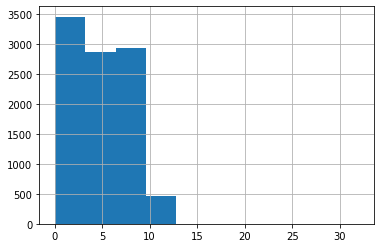

In [ ]:
df.Tenure.hist() # too big value

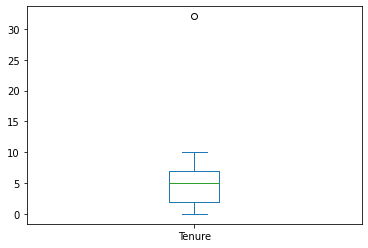

In [ ]:
df.Tenure.plot(kind = 'box')

In [ ]:
df.loc[(df.Tenure < 1) & (df.Tenure > 10), 'Tenure'] = df.Tenure.median()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df = df.loc[df.Tenure < 10] # just a more reliable system

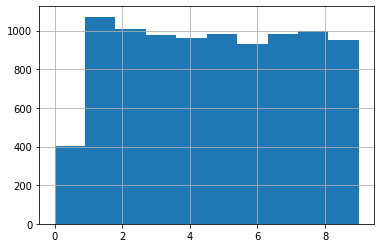

In [ ]:
df.Tenure.hist() # Those weird 652.0 values still appearing (on occasion) ? – Google Colab ?

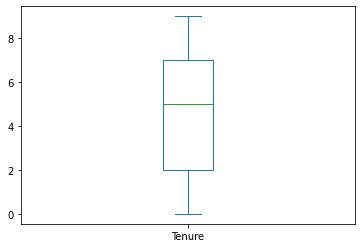

In [ ]:
df.Tenure.plot(kind = 'box')

In [ ]:
df.Tenure.value_counts(dropna = False)

1.0    1072
2.0    1010
8.0     998
7.0     985
5.0     982
3.0     979
4.0     960
9.0     949
6.0     932
0.0     401
Name: Tenure, dtype: int64

# **Balance**

In [ ]:
df.Balance.dtype

dtype('float64')

In [ ]:
df.Balance.value_counts(dropna = False)

0.00         3289
NaN           138
130170.82       2
142643.54       1
109106.80       1
             ... 
85534.83        1
118004.26       1
97286.16        1
109628.44       1
130142.79       1
Name: Balance, Length: 5842, dtype: int64

In [ ]:
df.Balance.isna().sum() # fine

138

In [ ]:
df.Balance.fillna(0, inplace = True)

In [ ]:
df.Balance.isna().sum() # better

0

In [ ]:
df.Balance.describe()

count    9.268000e+03
mean     7.577469e+04
std      6.407955e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.640114e+04
75%      1.274289e+05
max      1.036826e+06
Name: Balance, dtype: float64

In [ ]:
# NaN values

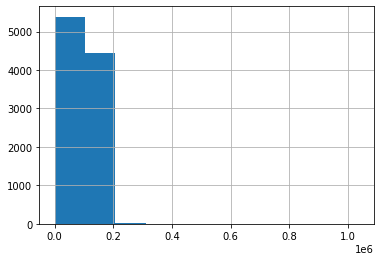

In [ ]:
df_original.Balance.hist() # also, some too big numbers 

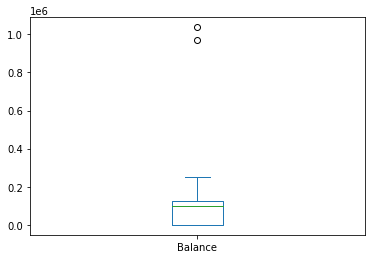

In [ ]:
df_original.Balance.plot(kind = 'box') # 2 points to check

In this case – the DATA was taken from a real banking, thus Balance could be potentially real (should be additionally check). But I can’t simply reject a situation, that to an account was transferred an amount from an insurance, lottery, etc. Also, the amount is significantly higher than average, so to be introduced to any prediction model, as it should cause problems like overfitting, etc – therefore, I am going to leave those 2 Banking points aside.

In [ ]:
df_original.iloc[2135]

CustomerId              15704284
Surname                Ekechukwu
CreditScore                736.0
Geography                Germany
Gender                      Male
Age                         57.0
Tenure                       9.0
Balance            969780.196938
NumOfProducts                1.0
HasCrCard                    1.0
IsActiveMember               0.0
EstimatedSalary         28434.44
Exited                         1
Name: 2135, dtype: object

In [ ]:
df_original.iloc[5464] # The income is also high here, but I should avoid model’s overfitting 

CustomerId               15795540
Surname                      Reye
CreditScore                 556.0
Geography                  France
Gender                     Female
Age                          36.0
Tenure                        2.0
Balance            1036826.076171
NumOfProducts                 1.0
HasCrCard                     0.0
IsActiveMember                1.0
EstimatedSalary         177670.57
Exited                          0
Name: 5464, dtype: object

In [ ]:
df.Balance.loc[df.Balance < 1e+06]

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9994         0.00
9995         0.00
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 9267, dtype: float64

In [ ]:
df = df.loc[df.Balance < 0.5e+06]

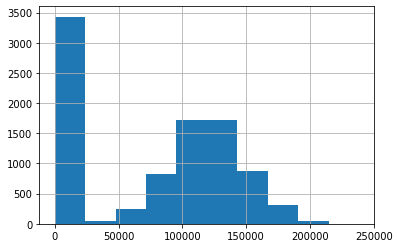

In [ ]:
df.Balance.hist() # For a math prediction model, I’ll need to think how to deal with ‘Balance = 0', too plentiful values 

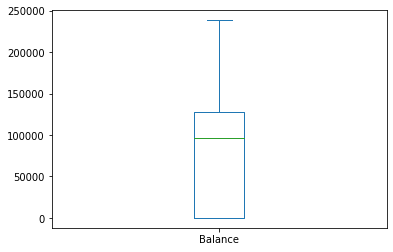

In [ ]:
df.Balance.plot(kind = 'box')

Contrary, to Balance in CreditScore I am going to change the value to MEDIAN, not an ideal solution, but at least robust to outliers.
I came from industrial R&D and therefore prefer to use 100% reliable data for my analysis/decisions, but on the over hand – I can’t simply waist too many data points. It should be a compromise.
In this particularly DATA, it is reasonably small and clean – all questionable points wouldn’t exceed more than 10% of all  the data, but in a case of DATA with much higher number of parameters – I will be force to seek a compromise based on assumption and reliability 


In [ ]:
df.loc[df.CreditScore > 1500] = df.CreditScore.median()

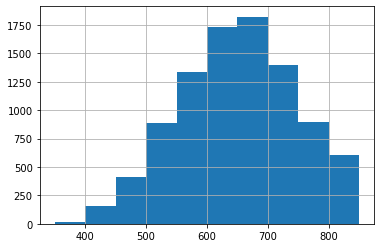

In [ ]:
df.CreditScore.hist() # looks better

In [ ]:
df.Balance.isna().sum() # a double check

0

# **NumOfProducts**

In [ ]:
df.NumOfProducts.dtype

dtype('float64')

In [ ]:
df.NumOfProducts.value_counts(dropna = False)

 1.00000      4594
 2.00000      4111
 NaN           268
 3.00000       233
 4.00000        52
-2.00000         3
-1.00000         2
 652.00000       2
 11.17746        1
Name: NumOfProducts, dtype: int64

In [ ]:
df.NumOfProducts.isna().sum() # fine

268

In [ ]:
df.NumOfProducts.fillna(1, inplace = True) # A customer at least has an account still opened
df.NumOfProducts.isna().sum() # better

0

In [ ]:
df.NumOfProducts = df.NumOfProducts.astype(str)

In [ ]:
df.NumOfProducts = df.NumOfProducts.str.replace('-', '', regex = False)

In [ ]:
df.NumOfProducts = df.NumOfProducts.astype(float)

In [ ]:
df.NumOfProducts.describe()

count    9266.000000
mean        1.652728
std         9.574159
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       652.000000
Name: NumOfProducts, dtype: float64

Just for sake of the math model, anything above 10 – I’ll change to MEDIAN (just a couple of quite weird numbers)

In [ ]:
df.loc[df.NumOfProducts > 10, 'NumOfProducts'] = df.NumOfProducts.median()

In [ ]:
df.NumOfProducts.value_counts(dropna = False) # double check

1.0    4867
2.0    4114
3.0     233
4.0      52
Name: NumOfProducts, dtype: int64

# **HasCrCard**

In [ ]:
df.HasCrCard.dtype

dtype('float64')

In [ ]:
df.HasCrCard.value_counts(dropna = False)

1.0      6473
0.0      2717
NaN        74
652.0       2
Name: HasCrCard, dtype: int64

In [ ]:
df.HasCrCard.isna().sum() # fine, just to check NaN values

74

In [ ]:
df.HasCrCard.fillna(0, inplace = True)
df.HasCrCard.isna().sum() # better

0

In [ ]:
df_original.loc[df_original.HasCrCard.isin([652.0])] # should be checked

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df = df.loc[df.HasCrCard < 10] # a more reliable system

In [ ]:
df.HasCrCard.value_counts(dropna = False)

1.0    6473
0.0    2791
Name: HasCrCard, dtype: int64

# **IsActiveMember**

In [ ]:
df.IsActiveMember.dtype

dtype('float64')

In [ ]:
df.IsActiveMember.value_counts(dropna = False)

1.0    4731
0.0    4455
NaN      78
Name: IsActiveMember, dtype: int64

In [ ]:
df.IsActiveMember.isna().sum() # fine, NaN values

78

In [ ]:
df.IsActiveMember.fillna(0, inplace = True)
df.IsActiveMember.isna().sum() # better

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

# **EstimatedSalary**

In [ ]:
df.EstimatedSalary.dtype

dtype('float64')

In [ ]:
df.EstimatedSalary.value_counts(dropna = False)

NaN          41
24924.92      2
101348.88     1
58076.52      1
78854.57      1
             ..
2923.61       1
121232.51     1
2053.42       1
6382.46       1
38190.78      1
Name: EstimatedSalary, Length: 9223, dtype: int64

In [ ]:
df.EstimatedSalary.isna().sum() # fine, NaN values

41

In [ ]:
df.EstimatedSalary.fillna(0, inplace = True) # If a person’s income is unknown - the person only started to earn, or stopped. I am going to put unknown income as 0 
df.EstimatedSalary.isna().sum() # reasonable compromise/assumption 

0

In [ ]:
df.EstimatedSalary.describe()

count      9264.000000
mean      99399.669302
std       57821.968398
min           0.000000
25%       49832.575000
50%       99594.475000
75%      148902.897500
max      199992.480000
Name: EstimatedSalary, dtype: float64

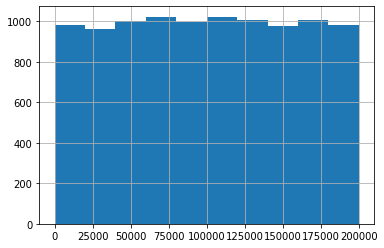

In [ ]:
df_original.EstimatedSalary.hist() # looks reasonable

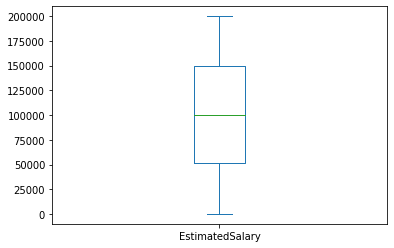

In [ ]:
df_original.EstimatedSalary.plot(kind = 'box') # fine

# **Exited**

In [ ]:
df.Exited.dtype

dtype('int64')

In [ ]:
df.Exited.value_counts(dropna = False)

0    7383
1    1881
Name: Exited, dtype: int64

In [ ]:
df.Exited.isna().sum()

0

In [ ]:
pd.isna(df).sum() # nice

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**--------------------------------------------------------------------------------**

# **FURTHER ACTIONES**

**--------------------------------------------------------------------------------**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
fig_pie = px.pie(df, 'Geography', title = 'Bank Geography')
fig_pie.show()

In [ ]:
#fig_pie = make_subplots(rows = 1, cols = 2)
#fig_pie = px.pie((df, 'Geography', title = 'Bank Geography'), row = 1, col = 1)
#fig_pie = (px.pie(df, 'Gender', title =' Bank Gender'), row = 1, col = 2)

'CustomerId' and 'Surname' columns are important for banking information, but for a generalized prediction model those columns not only useless, but also unnecessary – as a math model takes numbers from 'CustomerId' as a numerical parameter – that should be avoided 

In [ ]:
df.drop(['CustomerId', 'Surname'], axis = 1, inplace = True)

In [ ]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2184,652.0,France,Female,40.0,1.0,0.0,2.0,1.0,0.0,126554.96,0
1353,626.0,Spain,Male,29.0,7.0,0.0,2.0,1.0,0.0,49361.84,0
457,711.0,France,Male,38.0,3.0,0.0,2.0,1.0,0.0,68487.51,0


In [ ]:
fig_age_balance = px.scatter(df, x = 'Age', y = 'Balance', color = 'Geography', trendline ='ols') # 0 line
fig_age_balance['layout']['title']['text'] = 'Balance vs Age'
fig_age_balance.update_xaxes(title_text = 'Customers Age')
fig_age_balance.update_yaxes(title_text = 'Income')
fig_age_balance.show()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Pivot_Table_gender

In [ ]:
gender_pivot_df = (
    df.Gender.to_frame()
    .assign(temp =1)
    .reset_index()
    .rename(columns={'index':'id'})
    .pivot_table(
        index='id',
        columns='Gender',
        values='temp',
        fill_value=0
    )
)

In [ ]:
gender_pivot_df.head()

Gender,Female,Male,non_declared
id,,,
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
gender_pivot_df.sum().sort_values(ascending = False)

Gender
Male            4946
Female          4056
non_declared     262
dtype: int64

In [ ]:
gender_pivot_df.dtypes

Gender
Female          int64
Male            int64
non_declared    int64
dtype: object

In [ ]:
df = df.merge(
    gender_pivot_df,
    left_index=True,
    right_index=True,
    how='left'
).drop('Gender', axis=1)

In [ ]:
df.sample(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,non_declared
8932,713.0,Spain,26.0,4.0,122857.46,2.0,1.0,0.0,144682.17,1,1,0,0
7353,596.0,France,21.0,4.0,210433.08,2.0,0.0,1.0,197297.77,1,0,1,0
5564,609.0,Spain,39.0,2.0,139443.75,2.0,1.0,0.0,9234.06,0,0,1,0
5979,677.0,France,24.0,0.0,148298.59,2.0,0.0,0.0,182913.95,0,1,0,0
4386,783.0,Germany,42.0,2.0,139707.28,1.0,1.0,0.0,2150.22,0,1,0,0


In [ ]:
import plotly.graph_objects as go
from _plotly_utils.colors import colorscale_to_scale

In [ ]:
df_gr = df.sample(500)

In [ ]:
fig_gr = go.Figure()
cols = ['Female', 'Male', 'non_declared']

for col in cols:
  fig_gr.add_trace(go.Bar(x = df_gr['Geography'], y = df_gr[col], name = col))

fig_gr.update_layout(title_text = "customers' geography and sex")

----------------------------------------------------------------------------

**Label Encoder**

I don’t have enough suitable columns in this DATA to play with, therefore I am going to play with the same columns repeatedly 

In [ ]:
df_label_encoder = df_original

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
label_encoder = LabelEncoder()
enc_Geography = label_encoder.fit_transform(df_label_encoder.Geography)

In [ ]:
np.bincount(enc_Geography)

array([4923, 2451, 2431,  195])

In [ ]:
label_encoder.classes_

array(['France', 'Germany', 'Spain', 'non_avail'], dtype=object)

or even:

In [ ]:
{
    k : v
    for k, v in enumerate(label_encoder.classes_)
}

{0: 'France', 1: 'Germany', 2: 'Spain', 3: 'non_avail'}

In [ ]:
df_label_encoder.Geography = enc_Geography

In [ ]:
df_label_encoder.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
809,15778463,Ikenna,657.0,0,Female,37.0,6.0,95845.60,1.0,1.0,0.0,122218.23,0
4510,15657747,Zito,611.0,1,Female,43.0,9.0,127216.31,2.0,0.0,1.0,17913.25,0
4060,15593250,Hsiao,640.0,0,Female,29.0,4.0,0.00,2.0,1.0,0.0,44904.26,0
7174,15785339,nan,640.0,0,Female,50.0,9.0,117565.03,2.0,0.0,0.0,82559.77,0
5427,15674149,Esomchi,599.0,1,Male,36.0,3.0,128960.21,2.0,1.0,1.0,40318.33,0


--------------------------------------------------------------------------------

**Group_by**

In [ ]:
df.groupby('Geography').EstimatedSalary.mean().reset_index()

,Geography,EstimatedSalary
0,France,99053.508442
1,Germany,100635.311710
2,Spain,98706.471648
3,non_avail,101270.381006


In [ ]:
gr_ge_ag = df.groupby(['Geography', 'Age']).EstimatedSalary.mean()

In [ ]:
gr_ge_ag.unstack()

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,92.0
Geography,,,,,,,,,,,,,,,,,,,,,
France,78507.960000,76022.877273,99558.723158,92602.662593,100148.584651,114495.782000,112696.310303,97042.279545,102543.498544,104752.586789,...,103538.5875,73337.204,97708.285,80294.59,65801.44,58890.65,182055.36,NaN,188484.52,115000.41
Germany,103942.901667,102157.732500,99299.800000,106867.353636,63447.693750,108432.950417,117006.733200,102403.981905,96909.484500,103506.295000,...,121532.6700,20291.525,142566.750,NaN,NaN,50783.88,NaN,92934.41,186235.98,NaN
Spain,72442.810000,114844.582857,89999.578462,136238.550000,100712.491304,109415.817143,93575.930000,87267.489375,107643.399535,95762.287045,...,78321.2600,112424.875,119207.025,174118.93,34164.05,NaN,NaN,NaN,NaN,NaN
non_avail,NaN,NaN,150245.810000,NaN,77185.453333,NaN,63995.550000,176132.635000,130079.675000,83740.470000,...,NaN,NaN,NaN,NaN,188603.07,NaN,NaN,NaN,NaN,NaN


In [ ]:
gr_ge_ag.unstack()[[18.0, 35.0]]

Age,18.0,35.0
Geography,,
France,78507.960000,88787.188066
Germany,103942.901667,114821.069906
Spain,72442.810000,96713.472833
non_avail,NaN,90246.125714


-----------------------------------------------------------------------------

**Multi_Label_Binarizer** to try

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
mlb = MultiLabelBinarizer()

In [ ]:
Geography_transformed = mlb.fit_transform(df.Geography.tolist())

In [ ]:
Geography_transformed

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 0]])

In [ ]:
Geography_mlb_df = pd.DataFrame(
    Geography_transformed,
    index=df.index,
    columns=mlb.classes_
)

----------------------------------------------------------------------------

**One_Hot_Encoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit_transform(df[['Geography']])

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
countries_encoded = ohe.fit_transform(df[['Geography']].values) # [[....]] 2D array

In [ ]:
ohe.categories_ # looks better, than mlb

[array(['France', 'Germany', 'Spain', 'non_avail'], dtype=object)]

In [ ]:
countries_df = pd.DataFrame(
    countries_encoded,
    index=df.index,
    columns=ohe.categories_
).astype(int)

In [ ]:
countries_df.columns

MultiIndex([(   'France',),
            (  'Germany',),
            (    'Spain',),
            ('non_avail',)],
           )

In [ ]:
countries_df.columns = [x[0] for x in countries_df.columns] # columns from tuples to normal - save the 1st part of each tuple - i.e (... ,)

In [ ]:
df = df.merge(
    countries_df,
    left_index=True,
    right_index=True,
    how = 'right'
).drop('Geography', axis=1)

In [ ]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,non_declared,France,Germany,Spain,non_avail
2086,725.0,32.0,0.0,0.00,2.0,1.0,1.0,138525.19,0,1,0,0,0,0,1,0
6724,752.0,41.0,8.0,0.00,1.0,1.0,0.0,139844.04,1,1,0,0,1,0,0,0
2515,564.0,40.0,4.0,0.00,1.0,1.0,0.0,85455.62,1,0,1,0,1,0,0,0
8834,657.0,34.0,3.0,107136.60,1.0,1.0,0.0,153895.46,0,0,1,0,1,0,0,0
374,717.0,35.0,7.0,58469.37,2.0,1.0,1.0,172459.39,0,0,1,0,0,1,0,0


________________________________________________________________________________

**Outiers Double Check**

In [ ]:
nan_counter = df.isin([np.nan, 'nan','NA', 'NaN', 'Nan', 'Null', 'null', -99]).sum(axis = 1)

In [ ]:
nan_counter.value_counts() # good

0    9264
dtype: int64

In [ ]:
# nan_counter_1 = df.CreditScore.str.contains('nan').astype(int)
# nan_counter_total = nan_counter + nan_counter_1
# df.loc[nan_counter_total > 1]

or

In [ ]:
#for x in nan_counter:
#  print(x)

also

In [ ]:
[x for x in nan_counter if x > 0]

[]

-------------------------------------------------------------------------

Here cut the DATA into 2 parts – 0 on an account and something

In [ ]:
df_real = df.loc[df.Balance > 0 ]

In [ ]:
df_real.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,non_declared,France,Germany,Spain,non_avail
730,591.0,24.0,6.0,147360.00,1.0,1.0,1.0,25310.82,0,0,1,0,1,0,0,0
6453,566.0,44.0,5.0,141428.99,2.0,0.0,0.0,68408.74,0,1,0,0,0,1,0,0
3615,415.0,46.0,9.0,134950.19,3.0,0.0,0.0,178587.36,1,0,1,0,1,0,0,0
8607,602.0,38.0,2.0,71667.97,2.0,0.0,0.0,137111.89,0,0,1,0,0,1,0,0
5888,443.0,54.0,3.0,138547.97,1.0,1.0,1.0,70196.23,1,1,0,0,1,0,0,0


'Exited' correlations

In [ ]:
correlation = df_real.corr()
excor = correlation['Exited']
excor

CreditScore       -0.037109
Age                0.305350
Tenure            -0.008051
Balance            0.013625
NumOfProducts      0.073826
HasCrCard         -0.007699
IsActiveMember    -0.171000
EstimatedSalary    0.008109
Exited             1.000000
Female             0.108037
Male              -0.110592
non_declared       0.009761
France            -0.113415
Germany            0.158139
Spain             -0.051363
non_avail         -0.006676
Name: Exited, dtype: float64

In [ ]:
fig_ex_cor = px.bar(excor, title = 'Exited correlations')
fig_ex_cor.update_xaxes(title_text = 'Factor')
fig_ex_cor.update_yaxes(title_text = 'correlation')

fig_ex_cor.show()

In [ ]:
df_o = df - df_real

In [ ]:
df_o.groupby('Age').EstimatedSalary.mean() # Predictable

Age
0.0    0.0
Name: EstimatedSalary, dtype: float64

In [ ]:
len(df_real)

5837

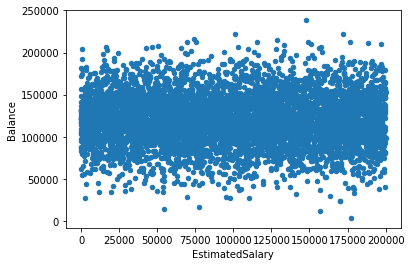

In [ ]:
df_real.plot.scatter(x = 'EstimatedSalary', y = 'Balance')

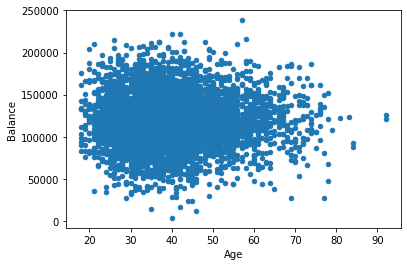

In [ ]:
df_real.plot.scatter(x = 'Age', y = 'Balance')

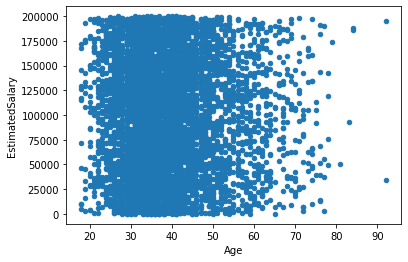

In [ ]:
df_real.plot.scatter(x = 'Age', y = 'EstimatedSalary')

--------------------------------------------------------------------------------

**PCA**

In [ ]:
pca_df = df_real[['Balance', 'EstimatedSalary', 'CreditScore']].copy()

In [ ]:
pca_df.sample(5)

,Balance,EstimatedSalary,CreditScore
4824,136364.46,142754.71,727.0
9010,121669.93,91.75,645.0
6997,82547.11,146448.01,611.0
4225,146943.38,130041.45,648.0
3277,126619.27,198224.38,790.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st_sc = StandardScaler()

In [ ]:
pca_df['Balance'] = st_sc.fit_transform(pca_df[['Balance']])

In [ ]:
pca_df['EstimatedSalary'] = st_sc.fit_transform(pca_df[['EstimatedSalary']])

In [ ]:
pca_df['CreditScore'] = st_sc.fit_transform(pca_df[['CreditScore']])

In [ ]:
pca_df.sample(5)

,Balance,EstimatedSalary,CreditScore
1300,0.493352,1.080873,-1.157629
2348,0.308849,-0.693735,1.782023
5,-0.205576,0.859742,-0.057829
9965,-1.222754,1.025800,-0.242842
9395,-1.459008,1.336191,-0.242842


In [ ]:
pca_df.describe()

,Balance,EstimatedSalary,CreditScore
count,5.837000e+03,5.837000e+03,5.837000e+03
mean,-2.392010e-16,3.834521e-17,1.113837e-16
std,1.000086e+00,1.000086e+00,1.000086e+00
min,-3.866845e+00,-1.736583e+00,-3.089987e+00
25%,-6.551787e-01,-8.540169e-01,-6.848174e-01
50%,-2.394058e-03,1.545413e-02,1.412084e-02
75%,6.548375e-01,8.555990e-01,6.925020e-01
max,3.943187e+00,1.730301e+00,2.049264e+00


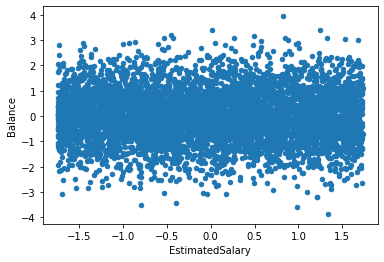

In [ ]:
pca_df.plot.scatter(x = 'EstimatedSalary', y = 'Balance')

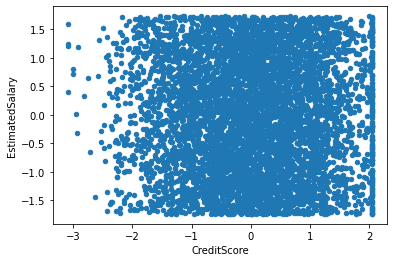

In [ ]:
pca_df.plot.scatter(x = 'CreditScore', y = 'EstimatedSalary')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 3)

In [ ]:
pca.fit(pca_df.values)

PCA(n_components=3)

In [ ]:
import matplotlib.pyplot as plt

[ 0.06162554 -0.70807953 -0.70520232]
[ 0.99610086 -0.00303985  0.09009856]
[ 0.06578834  0.7063696  -0.70350252]


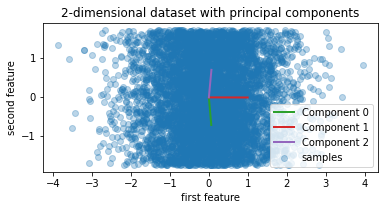

In [ ]:
plt.scatter(pca_df.values[:, 0], pca_df.values[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    print(comp)
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=2,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)

plt.legend()
plt.show()

# **----------------------------------------------------------------------------**

In [ ]:
df.shape

(9264, 16)

In [ ]:
df.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,non_declared,France,Germany,Spain,non_avail
2851,603.0,48.0,5.0,0.0,1.0,1.0,0.0,100478.6,1,1,0,0,1,0,0,0


In [ ]:
df.dtypes # Once more time in Google Colab each time gives different result in the same place ?

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
Female               int64
Male                 int64
non_declared         int64
France               int64
Germany              int64
Spain                int64
non_avail            int64
dtype: object

**-------------------------------------------------------------------**

In [ ]:
df_ar = pd.DataFrame(
    {'x' : np.arange (3), 'y' : np.arange (4,7)}
)
df_ar

,x,y
0,0,4
1,1,5
2,2,6


In [ ]:
df_ar.sum() # sum per column = df_ar.sum(axis = 0)

x     3
y    15
dtype: int64

In [ ]:
df_ar.sum(axis = 1)

0    4
1    6
2    8
dtype: int64

In [ ]:
df_ar.to_csv('df_lies.csv', sep = ';')

--------------------------------------------------------------------------

In [ ]:
df_o.rename({'Age':'customer_age'}, axis=1, inplace = True) # column rename
df_o.sample()

,CreditScore,customer_age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,non_declared,France,Germany,Spain,non_avail
6002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df_o.T

In [ ]:
#df_o.head()

In [ ]:
#df_o.drop(3)